## CAPSTONE PROJECT - CLASSIFICATION

## Deskripsi Data 

1.   ID: Pengenal unik untuk satu baris.
2.   Gender: Jenis kelamin pelanggan.
3.   Age: Usia pelanggan (dalam tahun)
4.   Region_Code: Kode wilayah untuk pelanggan
5.   Occupation: Jenis pekerjaan untuk pelanggan
6.   Channel_Code: Kode channel akuisisi untuk pelanggan (encoded)
7.   Account_age: Jumlah bulan atau kuartal dimana akun saving dibuka.
8.   Credit_Product: Apakah nasabah memiliki produk kredit aktif (KPR, personal loan, kartu kredit, dan lain-lain)
9.   Avg_Account_Balance: Rata-rata saldo rekening nasabah dalam 12 bulan terakhir
10.  Is_Active: Apakah pelanggan aktif dalam 3 bulan terakhir
11.  Is_lead: 0 : Pelanggan tidak tertarik, 1 : Pelanggan tertarik


> Dalam kasus ini kita akan melakukan prediksi Is_Lead sebagai variabel respon.

#### IMPORT PACKAGES

In [356]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### READ DATASET

In [357]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path = 'capstone case/'

In [358]:
# Load data
df = pd.read_csv(os.path.join("train.csv"), encoding='utf-8')
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [359]:
df.shape

(245725, 11)

In [360]:
#mengganti nama kolom vintage menjadi account_age
df.rename(columns={"Vintage":"Account_age"}, inplace=True)

In [361]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_age,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


#### PROBLEM STATEMENT

Happy Customer Bank adalah bank swasta menengah yang menangani semua jenis produk perbankan, seperti tabungan, giro, produk investasi, serta produk kredit, di antara penawaran lainnya. Bank ini juga melakukan cross-selling produk kepada nasabah yang sudah ada dan untuk melakukannya mereka menggunakan berbagai jenis komunikasi seperti telecalling, e-mail, rekomendasi tentang net banking, mobile banking, dan lain-lain. Dalam hal ini, Happy Customer Bank ingin melakukan cross-selling kartu kreditnya kepada nasabah yang sudah ada. Bank telah mengidentifikasi satu set pelanggan yang memenuhi syarat untuk mengambil kartu kredit ini. Sekarang, bank meminta bantuan Anda dalam mengidentifikasi pelanggan yang dapat menunjukkan ketertarikan yang lebih tinggi terhadap kartu kredit yang direkomendasikan. Lakukan analisis dan prediksikan Is_Lead berdasarkan variabel yang ada.


sehingga pertanyaan yang akan muncul adalah
1. Bagaimana sebaran pekerjaan customer?
2. Bagaimana hubungan antara pekerjaan dengan ketertarikan terhadap kartu kredit?
3. Bagaimana hubungan umur customer dengan ketertarikan terhadap kartu kredit?
4. Bagaimana hubungan durasi customer membuka account saving dengan ketertarikan terhadap kartu kredit?
5. Bagaimana hubungan credit_product dengan ketertarikan terhadap kartu kredit?
dst.....

#### EDA

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Account_age          245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [363]:
df.describe()

,Age,Account_age,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


disini dapat dilihat maksimal umur pelanggan adalah 85 tahun, minimal durasi pembukaan akun saving adalah 7 bulan

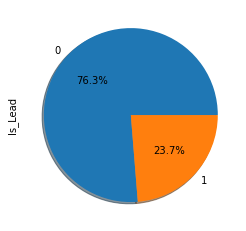

In [364]:
# Mencari perbandingan label/class
df['Is_Lead'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.savefig("Perbandingan Label Pertama.jpg", bbox_inches="tight")
plt.show()

In [365]:
df['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [366]:
df.shape

(245725, 11)

Disini karena data imbalance maka akan dilakukan balancing menggunakakan teknik undersampling karena datanya cukup banyak

In [367]:
# menghitung panjang kelas minor
minority_class = len(df[df['Is_Lead'] == 1])
print(minority_class)

58288


In [368]:
# index kelas major
majority_class_indices = df[df['Is_Lead'] == 0].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      7,      8,
                 9,     10,
            ...
            245715, 245716, 245717, 245718, 245719, 245720, 245721, 245722,
            245723, 245724],
           dtype='int64', length=187437)


In [369]:
# menggunakan numpy untuk memilih secara acak dari kelas major
random_majority_indices = np.random.choice(majority_class_indices, minority_class, replace=False)
print(len(random_majority_indices))

58288


In [370]:
minority_class_indices = df[df['Is_Lead'] == 1].index
print(minority_class_indices)

Int64Index([     6,     15,     16,     17,     20,     29,     31,     34,
                36,     37,
            ...
            245683, 245684, 245690, 245693, 245694, 245697, 245699, 245709,
            245713, 245714],
           dtype='int64', length=58288)


In [371]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

In [372]:
data = df.loc[under_sample_indices]

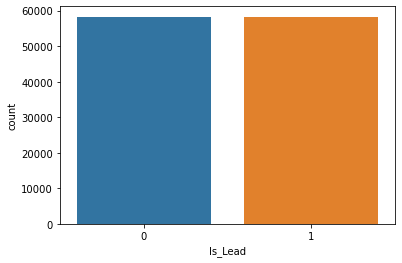

In [373]:
sns.countplot(x="Is_Lead", data=data)
plt.show()

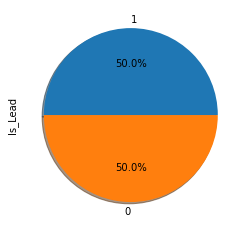

In [374]:
data['Is_Lead'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.savefig("Perbandingan Label Kedua.jpg", bbox_inches="tight")
plt.show()

setelah melakukan undersampling dapat dilihat disini bahwa label kolom is lead seimbang

In [375]:
data.shape

(116576, 11)

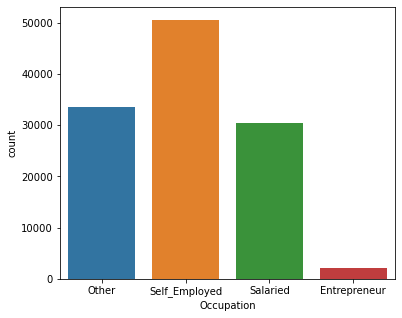

In [376]:
plt.figure(figsize=(6,5))
sns.countplot(data=data, x="Occupation")
plt.savefig("Sebaran Pekerjaan Customer.jpg", bbox_inches="tight")
plt.show()

pekerjaan customer terbanyak adalah self employed

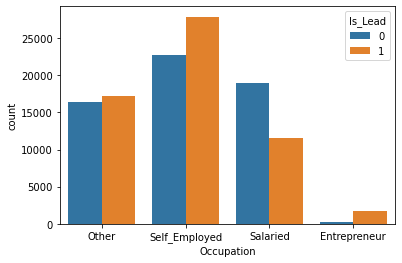

In [377]:
sns.countplot(data=data, x="Occupation", hue="Is_Lead")
plt.savefig("Hubungan Pekerjaan Dan Is_Lead.jpg", bbox_inches="tight")
plt.show()

kebanyakan customer tidak tertarik pada kartu kredit kecuali customer dengan pekerjaan entreprenur

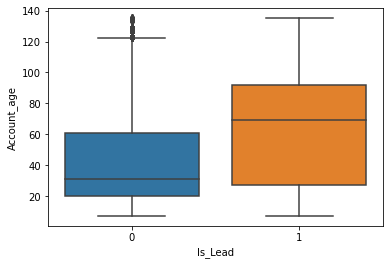

In [378]:
sns.boxplot(data=data, x="Is_Lead", y="Account_age")
plt.savefig("Hubungan Is_Lead dan Account_age.jpg", bbox_inches="tight")
plt.show()

customer yang menunjukan ketertarikan terhadap kartu kredit cenderung memiliki durasi pembukaan akun saving yang lebih lama

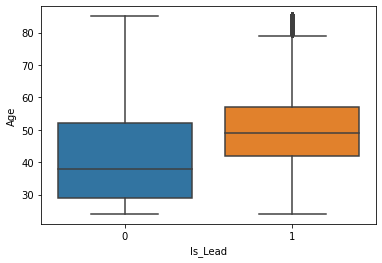

In [379]:
sns.boxplot(data=data, x="Is_Lead", y="Age")
plt.savefig("Hubungan Is_Lead dan Age.jpg", bbox_inches="tight")
plt.show()

customer yang tertarik memiliki rata rata umur sekitar 40 sampai 50 tahun keatas

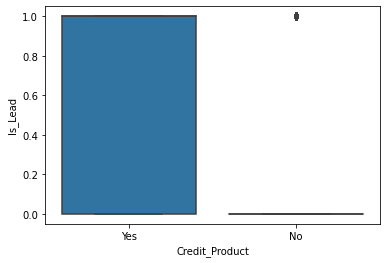

In [380]:
sns.boxplot(data=data, x="Credit_Product", y="Is_Lead")
plt.savefig("Hubungan Credit_product dan Is_lead.jpg", bbox_inches="tight")
plt.show()

Hampir semua customer yang mempunyai credit product tertarik menggunakan kartu kredit

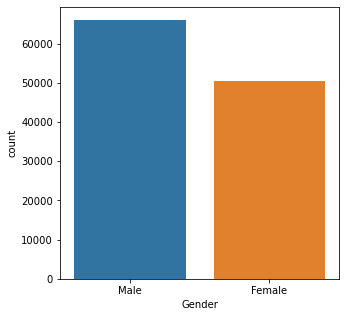

In [381]:
plt.figure(figsize=(5,5))
sns.countplot(data=data, x="Gender")
plt.show()

customer pada bank happy kebanyakan adalah laki laki

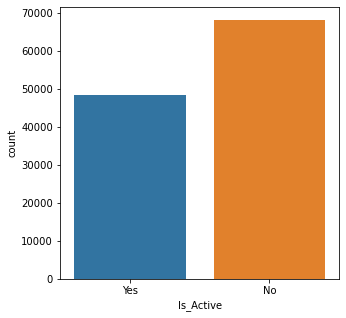

In [382]:
plt.figure(figsize=(5,5))
sns.countplot(data=data, x="Is_Active")
plt.show()

kebanyakan customer tidak aktif 3 bulan terakhir

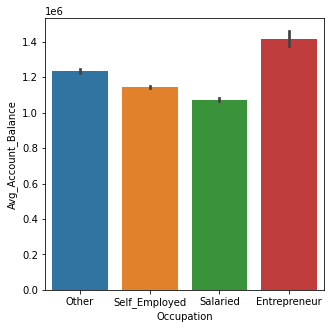

In [383]:
plt.figure(figsize=(5,5))
sns.barplot(data=data, x="Occupation", y="Avg_Account_Balance")
plt.show()

rata rata saldo rekening nasabah terbesar ada pada customer yang memiliki pekerjaan entreprenur

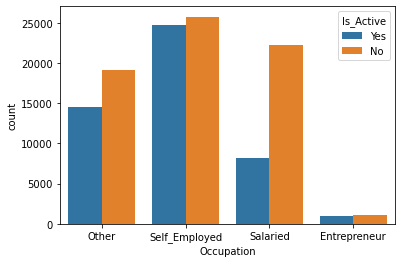

In [384]:
sns.countplot(data=data, x="Occupation", hue="Is_Active")
plt.show()

untuk customer dengan jenis pekerjaan salaried lebih banyak tidak aktif dalam 3 bulan terakhir

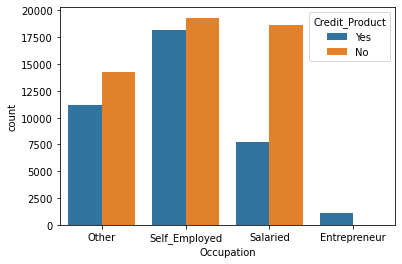

In [385]:
sns.countplot(data=data, x="Occupation", hue="Credit_Product")
plt.show()

kebanyakan customer yang memiliki pekerjaan sebagai entreprenur kebanyakan memiliki credit product

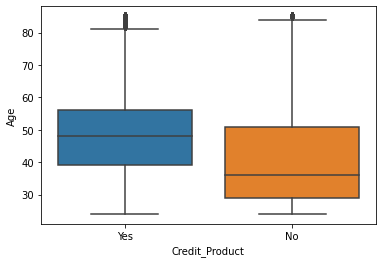

In [386]:
sns.boxplot(data=data, x="Credit_Product", y="Age")

kebanyakan customer yang memiliki credit product memiliki umur yang lebih tua

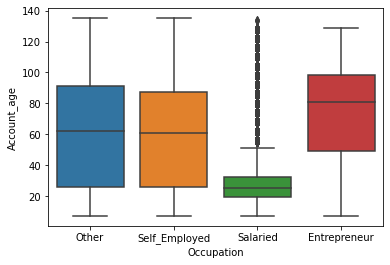

In [387]:
sns.boxplot(data=data, x="Occupation", y="Account_age")

entreprenur memiliki durasi pembukaan akun saving yang lebih lama dibandingkan dengan pekerjaan lain

#### DATA PRE-PROCESSING

In [388]:
data.shape

(116576, 11)

##### Mengecek tipe data

In [389]:
data.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Account_age             int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

tipe data telah sesuai

##### Mengecek Missing Value

In [390]:
# mengecek jumlah missing
jumlah_missing = data.isnull().sum()
jumlah_missing

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Account_age                0
Credit_Product         26329
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [391]:
# menghitung ratio missing value pada metrics credit_product
rasio = jumlah_missing.div(len(data))
rasio

ID                     0.000000
Gender                 0.000000
Age                    0.000000
Region_Code            0.000000
Occupation             0.000000
Channel_Code           0.000000
Account_age            0.000000
Credit_Product         0.225853
Avg_Account_Balance    0.000000
Is_Active              0.000000
Is_Lead                0.000000
dtype: float64

In [392]:
# Import SimpleImputer dari sklearn.impute

from sklearn.impute import SimpleImputer

# Mengatasi missing value dengan frequent category / modus

imp = SimpleImputer(strategy='most_frequent')

In [393]:
#Tampilkan hasil imputasi "SepalLengthCm"

data['Credit_Product'] = imp.fit_transform(data[['Credit_Product']])

In [394]:
# drop data yang kosong
#data = data.dropna(axis=0, how="any")

In [395]:
data.isnull().any()

ID                     False
Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Account_age            False
Credit_Product         False
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool

In [396]:
data.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Account_age            0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

tidak ada lagi data yang kosong

##### Mengecek Data Duplicated

In [397]:
# mengecek data duplicated
df[df.duplicated(keep=False)]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_age,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead


tidak ada data duplicated

In [398]:
def detect_outliers(data, x):
    Q1 = data[x].describe()['25%']
    Q3 = data[x].describe()['75%']
    IQR = Q3-Q1
    return data[(data[x] < Q1-1.5*IQR) | (data[x] > Q3+1.5*IQR)]

In [399]:
detect_outliers(data, 'Age')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_age,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead


In [400]:
detect_outliers(data, 'Account_age')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_age,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead


In [401]:
detect_outliers(data, 'Avg_Account_Balance')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_age,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
262,HJFEIUAE,Female,62,RG254,Other,X2,69,Yes,2729727,Yes,1
277,YEJ3FOPT,Male,42,RG268,Salaried,X3,121,Yes,2944493,Yes,1
454,8CU34OKF,Male,63,RG268,Salaried,X3,117,Yes,3005209,No,1
475,HDVOHVA3,Male,79,RG254,Other,X2,61,No,2768985,Yes,1
536,W7COBDCR,Male,38,RG268,Self_Employed,X2,26,No,5857499,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
40595,LPZQFNY7,Female,35,RG284,Salaried,X1,33,No,4656266,No,0
58118,D5MGNJTF,Male,49,RG269,Other,X2,104,No,6109342,Yes,0
150601,WJ8LAGPI,Male,66,RG283,Other,X3,81,Yes,2736705,No,0
119169,7GUGAU2Y,Female,26,RG284,Other,X1,14,No,3711148,Yes,0


In [402]:
data.shape

(116576, 11)

jumlah baris setelah selesai cleaning

##### Label Encoder

In [403]:
kategori = ['Gender', 'Occupation', 'Credit_Product', 'Is_Active']
df_cat = data[kategori]
df_cat.head()

,Gender,Occupation,Credit_Product,Is_Active
6,Male,Other,No,Yes
15,Male,Self_Employed,No,Yes
16,Female,Other,Yes,No
17,Female,Other,Yes,No
20,Male,Self_Employed,Yes,No


In [404]:
# Ubah kedalam bentuk numerik
encoded_data = LabelEncoder()

for feature in kategori:
        if feature in data.columns.values:
            data[feature] = encoded_data.fit_transform(data[feature])

data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_age,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,ETQCZFEJ,1,62,RG282,1,X3,20,0,1056750,1,1
15,UJ2NJKKL,1,33,RG268,3,X2,69,0,517063,1,1
16,CNGSPYWS,0,46,RG268,1,X3,97,1,2282502,0,1
17,VH7NBNNQ,0,59,RG283,1,X3,15,1,2384692,0,1
20,7PMYNWB3,1,44,RG269,3,X2,19,1,1001650,0,1


In [405]:
# drop kolom yang tidak penting
data.drop(['ID', "Region_Code", "Channel_Code"], inplace=True, axis=1)

In [406]:
data.head()

,Gender,Age,Occupation,Account_age,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,1,62,1,20,0,1056750,1,1
15,1,33,3,69,0,517063,1,1
16,0,46,1,97,1,2282502,0,1
17,0,59,1,15,1,2384692,0,1
20,1,44,3,19,1,1001650,0,1


##### Cek Korelasi

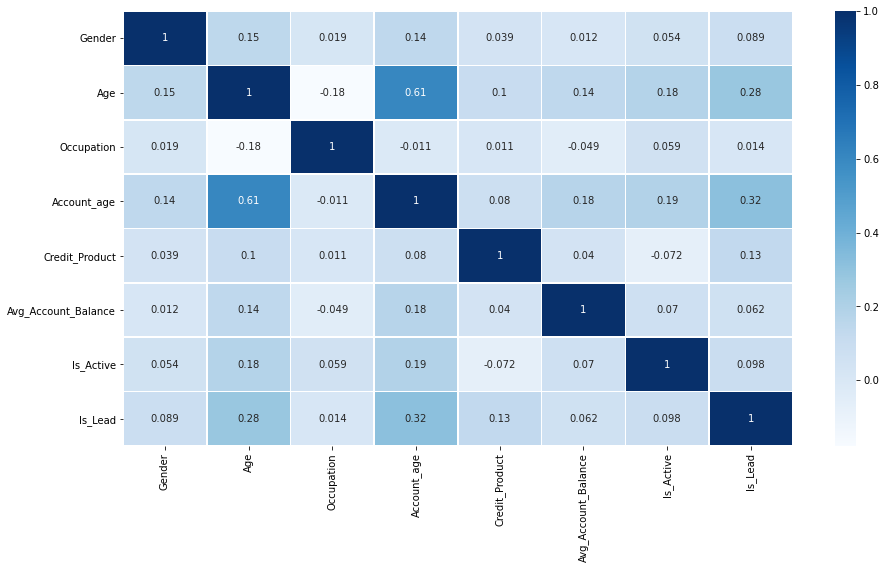

In [407]:
# Cek korelasi, mengasumsikan bahwa data bertime interval-rasio
# Melakukan perhitungan nilai korelasi dengan mengasumsikan data adalah data interval.
sns.heatmap(data.corr(),linewidths=.5,annot=True,cmap='Blues')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.savefig("Heatmap Corelation.jpg", bbox_inches="tight")
plt.show()

In [408]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = data.corr()["Is_Lead"].sort_values()
korelasi

Occupation             0.013977
Avg_Account_Balance    0.062040
Gender                 0.088662
Is_Active              0.097644
Credit_Product         0.133713
Age                    0.279240
Account_age            0.315128
Is_Lead                1.000000
Name: Is_Lead, dtype: float64

disini dapat dilihat bahwa variabel credit product memiliki korelasi terbesar dengan variabel is lead sedangkan untuk variabel is_active, gender, avg_account_balanced dan occupation karena memiliki korelasi di bawah 10% maka sebaiknya di drop

#### FEATURE ENGINEERING

In [409]:
data.drop(['Occupation', "Gender", "Avg_Account_Balance"], inplace=True, axis=1)
data.head()

,Age,Account_age,Credit_Product,Is_Active,Is_Lead
6,62,20,0,1,1
15,33,69,0,1,1
16,46,97,1,0,1
17,59,15,1,0,1
20,44,19,1,0,1


Drop data yang tidak punya korelasi tinggi kecuali kolom Avg_Account_Balance karena jumlah uang pada akun saving juga merupakan faktor penentu ketertarikan pada kartu kredit

##### SCALING

In [410]:
transformation_svm = MinMaxScaler().fit(data[['Age','Account_age', 'Credit_Product', 'Is_Active']])
data[['Age','Account_age', 'Credit_Product', 'Is_Active']]=transformation_svm.transform(data[['Age','Account_age', 'Credit_Product', 'Is_Active']])

data.head()

,Age,Account_age,Credit_Product,Is_Active,Is_Lead
6,0.622951,0.101562,0.0,1.0,1
15,0.147541,0.484375,0.0,1.0,1
16,0.360656,0.703125,1.0,0.0,1
17,0.573770,0.062500,1.0,0.0,1
20,0.327869,0.093750,1.0,0.0,1


scaling data agar perbedaanya tidak begitu jauh dengan data lainnya

#### MODELING

###### Membagi train test data

In [411]:
X = data.drop('Is_Lead', axis=1)
y = data['Is_Lead']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  81603
y Train :  81603
X Test :  34973
t Test :  34973


##### SKLEARN (Logistic Regression)

In [412]:
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [413]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()

,Age,Account_age,Credit_Product,Is_Active,Is_Lead,prediction
10163,0.311475,0.710938,0.0,1.0,1,1
1431,0.852459,0.765625,1.0,0.0,1,1
3188,0.295082,0.062500,0.0,0.0,0,0
148860,0.409836,0.101562,0.0,0.0,0,0
190483,0.295082,0.421875,0.0,1.0,0,0


In [414]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.657
Accuracy of logistic regression classifier test data: 0.658


#### EVALUATION

In [415]:
# Memilih k-fold (dipilih k = 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [416]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(logreg, X_train, y_train, cv=kfold)
print("Cross-validation scores: {:.3f}".format(scores.mean()))

Cross-validation scores: 0.657


In [417]:
param_grid_lr = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'class_weight':['balanced', None]}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=kfold)
grid_search_lr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3}".format(grid_search_lr.best_score_))

Best parameters: {'C': 0.001, 'class_weight': 'balanced'}
Best cross-validation score: 0.658


In [418]:
scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc = []
f1 = []
prec = []
recall = []
 
logreg = LogisticRegression(C = 10)
scores = cross_validate(logreg, X, y, cv=kfold, scoring=scoring)
 
acc.append(scores['test_acc'].mean())
f1.append(scores['test_F1'].mean())
prec.append(scores['test_prec'].mean())
recall.append(scores['test_recall'].mean())
 
 
print("Accuracy scores: ", acc)
print("f1 scores: ", f1)
print("Precision scores: ", prec)
print("Recall scores: ", recall)

Accuracy scores:  [0.6575795815894901]
f1 scores:  [0.6531689792974642]
Precision scores:  [0.6616903542654338]
Recall scores:  [0.6449216367278237]


In [419]:
# Terapkan pada data test
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
 
print("Accuracy score: ", accuracy_score(predictions, y_test))
print("Recall score: ", recall_score(predictions, y_test))

Accuracy score:  0.6585651788522574
Recall score:  0.6663348363295661


In [420]:
prediksi = [0.459016, 0.523438, 1.0, 0.044378]
hasil_prediksi = logreg.predict([prediksi])
print(hasil_prediksi)

[1]


Hasil prediksi dengan customer berumur 76 tahun dan telah membuka akun saving selama 48 bulan atau 4 tahun dan memiliki produk credit dan memiliki jumlah saldo di akun saving sebesar 0.2 atau 2 jutaan cenderung tertarik pada kartu kredit

In [421]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11653,  5698],
       [ 6247, 11375]], dtype=int64)

### LOAD AND PREDICT NEW DATA

In [422]:
df_test = pd.read_csv(os.path.join("test.csv"), encoding='utf-8')
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [423]:
df_test.shape

(105312, 10)

In [424]:
#mengganti nama kolom vintage menjadi account_age
df_test.rename(columns={"Vintage":"Account_age"}, inplace=True)

In [425]:
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_age,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [426]:
df_test.shape

(105312, 10)

In [427]:
df_test.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Account_age             int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object

In [428]:
df_test.isnull().any()

ID                     False
Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Account_age            False
Credit_Product          True
Avg_Account_Balance    False
Is_Active              False
dtype: bool

In [429]:
# drop data yang kosong
df_test = df_test.dropna(axis=0, how="any")

In [430]:
df_test.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Account_age            0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [431]:
# mengecek data duplicated
df_test[df_test.duplicated(keep=False)]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_age,Credit_Product,Avg_Account_Balance,Is_Active


In [432]:
df_test.shape

(92790, 10)

In [433]:
kategori = ['Gender', 'Occupation', 'Credit_Product', 'Is_Active']
df_cat_baru = df_test[kategori]
df_cat_baru.head()

,Gender,Occupation,Credit_Product,Is_Active
0,Male,Other,Yes,No
2,Male,Salaried,No,No
3,Male,Other,No,No
4,Female,Other,No,No
5,Male,Self_Employed,No,No


In [434]:
# Ubah kedalam bentuk numerik
encoded_data = LabelEncoder()

for feature_baru in kategori:
        if feature_baru in df_test.columns.values:
            df_test[feature_baru] = encoded_data.fit_transform(df_test[feature_baru])

df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Account_age,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,29,RG254,1,X1,25,1,742366,0
2,VK3KGA9M,1,31,RG270,2,X1,14,0,215949,0
3,TT8RPZVC,1,29,RG272,1,X1,33,0,868070,0
4,SHQZEYTZ,0,29,RG270,1,X1,19,0,657087,0
5,MZZAQMPT,1,60,RG268,3,X3,110,0,4624262,0


In [435]:
# drop kolom yang tidak penting
df_test.drop(['ID', "Region_Code", "Channel_Code", "Gender", "Occupation", "Avg_Account_Balance"], inplace=True, axis=1)

In [436]:
df_test.head()

,Age,Account_age,Credit_Product,Is_Active
0,29,25,1,0
2,31,14,0,0
3,29,33,0,0
4,29,19,0,0
5,60,110,0,0


In [437]:
transformation_svm_baru = MinMaxScaler().fit(df_test[['Age','Account_age', 'Is_Active', 'Credit_Product']])
df_test[['Age','Account_age', 'Is_Active', 'Credit_Product']]=transformation_svm_baru.transform(df_test[['Age','Account_age', 'Is_Active', 'Credit_Product']])
 
df_test.head()

,Age,Account_age,Credit_Product,Is_Active
0,0.081967,0.140625,1.0,0.0
2,0.114754,0.054688,0.0,0.0
3,0.081967,0.203125,0.0,0.0
4,0.081967,0.093750,0.0,0.0
5,0.590164,0.804688,0.0,0.0


In [438]:
test_prediction = LR.predict(df_test)
df_test['prediction'] = test_prediction
df_test

,Age,Account_age,Credit_Product,Is_Active,prediction
0,0.081967,0.140625,1.0,0.0,0
2,0.114754,0.054688,0.0,0.0,0
3,0.081967,0.203125,0.0,0.0,0
4,0.081967,0.093750,0.0,0.0,0
5,0.590164,0.804688,0.0,0.0,1
...,...,...,...,...,...
105307,0.459016,0.617188,1.0,1.0,1
105308,0.508197,0.617188,1.0,0.0,1
105309,0.180328,0.062500,0.0,0.0,0
105310,0.475410,0.671875,0.0,1.0,1


In [441]:
prediksi_test = [0.459016, 0.523438, 1.0, 0.044378]
hasil_prediksi_test = LR.predict([prediksi_test])
print(hasil_prediksi_test)

[1]


Hasil prediksi dengan customer berumur 30 tahun dan telah membuka akun saving selama 24 bulan atau 2 tahun dan memiliki produk credit dan memiliki jumlah saldo di akun saving sebesar 0.05 atau 500 ribu cenderung tidak tertarik pada kartu kredit

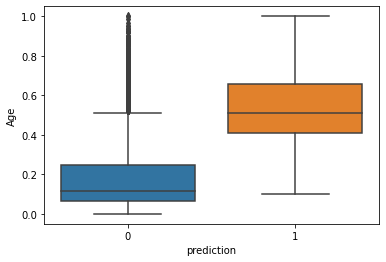

In [442]:
sns.boxplot(data=df_test, x="prediction", y="Age")
plt.savefig("Hubungan prediction dan umur.jpg", bbox_inches="tight")
plt.show()

disini dapat dilihat untuk prediksi customer yang tertarik pada kartu kredit dilambangkan dengan 1 berumur lebih tua dibandingkan dengan yang tidak tertarik

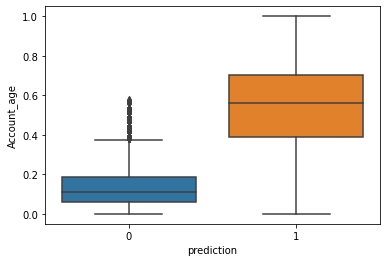

In [443]:
sns.boxplot(data=df_test, x="prediction", y="Account_age")
plt.savefig("Hubungan prediction dan lama akun.jpg", bbox_inches="tight")
plt.show()

disini dapat dilihat untuk prediksi customer yang tertarik pada kartu kredit dilambangkan dengan 1 memiliki durasi pembukaan akun saving yang lebih lama dibandingkan dengan yang tidak tertarik

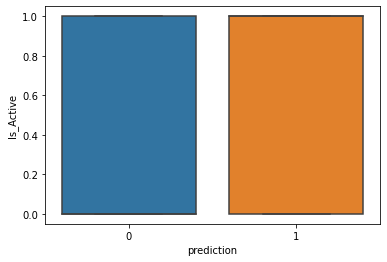

In [445]:
sns.boxplot(data=df_test, x="prediction", y="Is_Active")
plt.savefig("Hubungan prediction dan saldo akun.jpg", bbox_inches="tight")
plt.show()

disini dapat dilihat untuk prediksi customer yang tertarik pada kartu kredit dilambangkan dengan 1 memiliki rata rata saldo lebih banyak dibandingkan dengan yang tidak tertarik

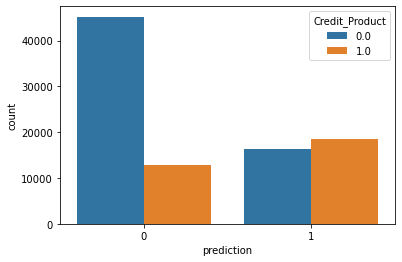

In [446]:
sns.countplot(data=df_test, x="prediction", hue="Credit_Product")
plt.savefig("Hubungan prediction dan produk kredit.jpg", bbox_inches="tight")
plt.show()

disini dapat dilihat untuk prediksi customer yang tertarik pada kartu kredit dilambangkan dengan 1 hampir semuanya memiliki produk kredit sedangkan yang tidak tertarik dilambangkan dengan 0 kebanyakan tidak mempunyai kredit produk

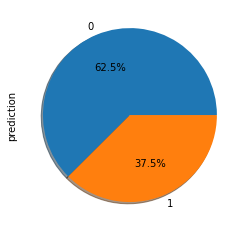

In [447]:
df_test['prediction'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

### KESIMPULAN/SARAN

Kesimpulan yang dapat diambil adalah hasil klasifikasi terhadap customer bank happy menunjukan bahwa customer yang memiliki produk kredit seperti KPR, personal loan dll, telah lama memiliki akun saving, berumur 50 tahun ke atas, dan memiliki saldo yang lumayan banyak memiliki ketertarikan sangat besar terhadap kartu kredit sehingga jika bank happy ingin menawarkan produk kartu kredit mereka, mereka dapat melihat beberapa kriteria seperti yang telah dijelaskan sebelumnya karena customer dengan kriteria demikian cenderung telah memiliki pekerjaan dan pengalaman yang lama dalam bisnis dan penggunaan produk bank sehingga akan semakin tertarik pada produk bank seperti kartu kredit 

Untuk hasil evaluasi model didapat hasil yang cukup bagus, dan apabila di lihat hasil scoring pada data train dan test, score menunjukkan angka yang bagus dan tidak ada perbedaan yang signifikan antara keduanya. dapat disimpulkan bahwa model tidak mengalami underfitting dan overfitting.